### Imputation of categorical feature

Categorical variables may also contain missing values. The methods of imputation share the same principle as those for numerical values.

Replacement of missing values by the most frequent category is the equivalent of mean/median imputation. It consists of replacing all occurrences of missing values (NA) within the most frequent label or category of the variable.

#### Assumptions
Replacement of NA by the most frequent category has the assumption that the data are missing completely at random (MCAR). The rationale is that the value that should have been seen for the missing observation is most likely the most frequent value or category.

#### Limitation
It may lead to over-representation of the most frequent label if there is a big number of NA

In [1]:
import numpy as np
import pandas as pd

In [3]:
# House_proce dataset
# lets load few cols of this dataset

cols_to_use = ['BsmtQual', 'FireplaceQu', 'GarageType', 'SalePrice']

data = pd.read_csv(r'./data/house_price.csv', usecols = cols_to_use)

#### About Columns
- BsmtQual: Evaluates the height of the basement

       Ex: Excellent (100+ inches)	
       Gd: Good (90-99 inches)
       TA: Typical (80-89 inches)
       Fa: Fair (70-79 inches)
       Po: Poor (<70 inches
       NA: No Basement

- FireplaceQu: Fireplace quality

       Ex: Excellent - Exceptional Masonry Fireplace
       Gd: Good - Masonry Fireplace in main level
       TA: Avg - Prefabricated Fireplace in main living area or Masonry Fireplace in basement
       Fa: Fair - Prefabricated Fireplace in basement
       Po: Poor - Ben Franklin Stove
       NA: No Fireplace

- GarageType: Garage location
		
       2Types: More than one type of garage
       Attchd: Attached to home
       Basment: Basement Garage
       BuiltIn: Built-In (Garage part of house - typically has room above garage)
       CarPort: Car Port
       Detchd: Detached from home
       NA: No Garage

In [4]:
data.head()

,BsmtQual,FireplaceQu,GarageType,SalePrice
0,Gd,NaN,Attchd,208500
1,Gd,TA,Attchd,181500
2,Gd,TA,Attchd,223500
3,TA,Gd,Detchd,140000
4,Gd,TA,Attchd,250000


In [9]:
# % of missing data
(data.isna().mean() * 100).map(lambda x : str(round(x, 2)) + '%')

BsmtQual        2.53%
FireplaceQu    47.26%
GarageType      5.55%
SalePrice        0.0%
dtype: object

* The variables BsmtQual and GarageType contain only a few observations with NA (2.5 and 5 %, respectively), therefore, replacing those observations with the value of the most frequent category is a good approach.

* On the other hand, the variable FireplaceQu, contains missing data in almost half of the observations. Therefore, replacing those with the most frequent category is most likely going to distort the relationship of the most frequent category with the sale price. In addition, if so many observations contain missing values, it has to be for a reason, so we would be better off capturing missingness somehow.

In [10]:
from sklearn.model_selection import train_test_split

In [12]:
X_train, X_test, y_train, y_test = train_test_split(data[['BsmtQual', 'FireplaceQu', 'GarageType']],
                                                   data['SalePrice'], test_size=0.3, random_state=0)

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

In [88]:
def draw_barplot(S):
    
    '''draw barplot for categorical column and color bars'''
    
    cnt = S.fillna('missing').value_counts()
    ax = sns.barplot(x = cnt.index, y=cnt)
    
    # get labels at x axis
    xlabels = [x.get_text() for x in ax.get_xmajorticklabels()]

    # find height of max bar
    bar_heights = [bar.get_height() for bar in ax.patches]
    max_height = max(bar_heights)
    
    # label corresponding to max heighted bar i.e. most frequest value
    freq_value = xlabels[bar_heights.index(max_height)]
    
    # loop through, 
    # if bar is of max height color it  blue 
    # if label is missing , color bar as red else grey
    # make sure color of max height bar is not overridden
    
    for bar , xlabel in zip(ax.patches, xlabels):
        if bar.get_height() == max_height:
            bar.set_color('tab:blue')
        if xlabel.lower() == 'missing':
            bar.set_color('tab:red')
        elif bar.get_height() != max_height:
            bar.set_color('grey')

    plt.show()
    return (freq_value)
    

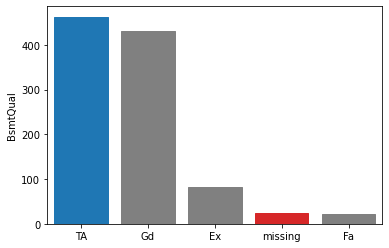

Most frequent value: TA


In [94]:
# BsmtQual
freq_val_BsmtQual = draw_barplot(X_train['BsmtQual'])
print(f"Most frequent value: {freq_val_BsmtQual}")

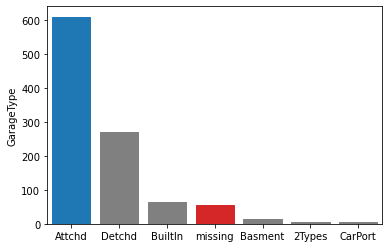

Most frequent value: Attchd


In [95]:
# GarageType
freq_val_GarageType = draw_barplot(X_train['GarageType'])
print(f"Most frequent value: {freq_val_GarageType}")

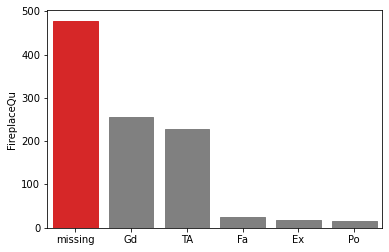

Most frequent value: missing


In [96]:
# FireplaceQu
freq_val_FireplaceQu = draw_barplot(X_train['FireplaceQu'])
print(f"Most frequent value: {freq_val_FireplaceQu}")

#### Impute missing values

In [97]:
def impute_missing_categorical(train_df, test_df, varname, freq_val):
    train_df[varname].fillna(freq_val, inplace=True)
    test_df[varname].fillna(freq_val, inplace=True)
    

In [99]:
for varname, freq_val in zip(['BsmtQual','GarageType'], [freq_val_BsmtQual, freq_val_GarageType]):
    impute_missing_categorical(X_train, X_test, varname, freq_val)

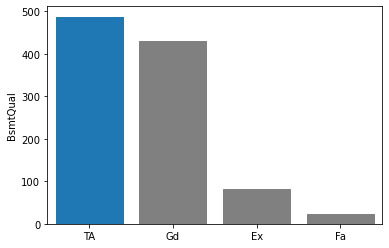

Frequent value : TA


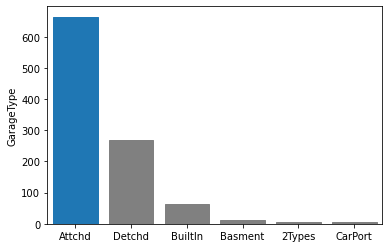

Frequent value : Attchd


In [100]:
# X_Train 
for varname in ['BsmtQual','GarageType']:
    freqval = draw_barplot(X_train[varname])
    print(f"Frequent value : {freqval}")

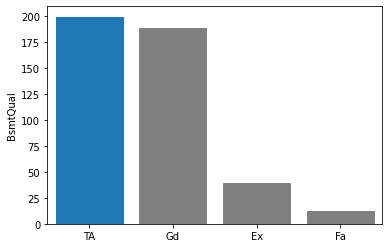

Frequent value : TA


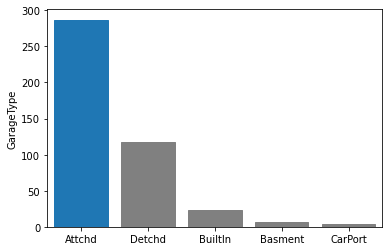

Frequent value : Attchd


In [101]:
# X_Test
for varname in ['BsmtQual','GarageType']:
    freqval = draw_barplot(X_test[varname])
    print(f"Frequent value : {freqval}")

### Adding a category to capture NA
- This is perhaps the most widely used method of missing data imputation for categorical variables. 
- This method consists in treating missing data as if they were an additional label or category of the variable. 
- All the missing observations are grouped in the newly created label 'Missing'.
- The beauty of this technique resides on the fact that it does not assume anything on the missingness of the values. It is very well suited when the number of missing data is high.

In [102]:
def impute_na_addcategory(df, variable):
    df[variable + '_NA' ]  = np.where(df[variable].isna(), 'Missing', df[variable])

In [103]:
impute_na_addcategory(X_train, variable='FireplaceQu')

In [104]:
impute_na_addcategory(X_test, variable='FireplaceQu')

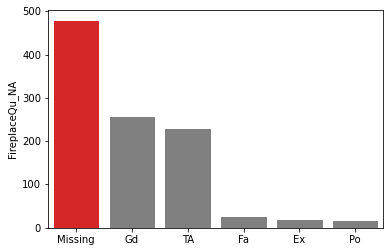

In [108]:
# train
freqval = draw_barplot(X_train['FireplaceQu_NA'])

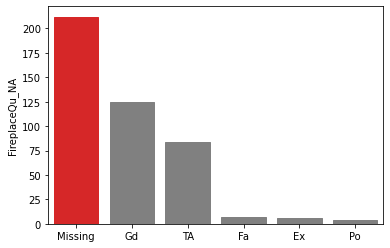

In [109]:
# test
freqvalue = draw_barplot(X_test['FireplaceQu_NA'])